# Filtros no lineales

In [132]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import footprint_rectangle
from skimage.filters.rank import mean, median
from skimage.util import random_noise
from scipy.ndimage import generic_filter
from skimage.util import img_as_ubyte

In [ ]:
def sigma_filter(values, median=False):
    mean = values[int((values.size)//2)]
    if median:
      mean = np.median(values)

    std = np.std(values)
    filtered_values = values[(values > mean - std) & (values < mean + std)]
    return np.mean(values) if filtered_values.size<=1 else np.mean(filtered_values)

In [134]:
morpho = cv2.imread('images/morpho.png', cv2.IMREAD_GRAYSCALE)

## Operaciones 3 - 7 - RUIDO SAL Y PIMIENTA

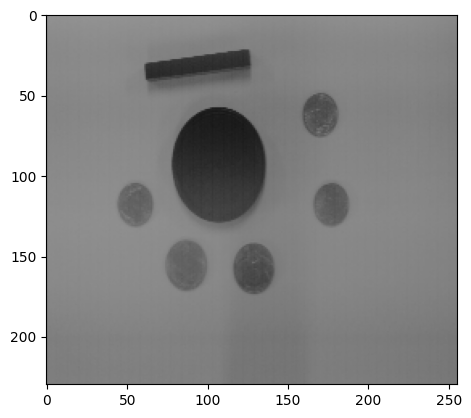

In [135]:
plt.imshow(morpho, cmap='gray', vmin=0, vmax=255)

In [144]:
noised_image = random_noise(morpho, mode='s&p', amount=0.25)

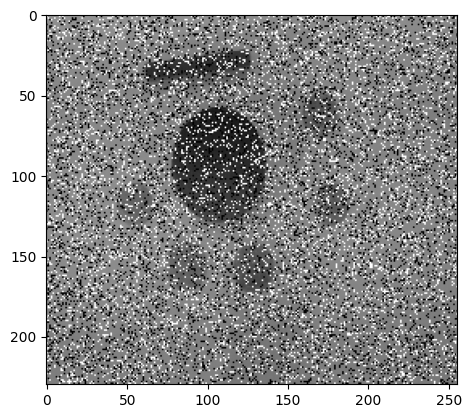

In [145]:
plt.imshow(noised_image, cmap='gray', vmin=0, vmax=1)

# Filtro Promedio 3x3

In [138]:
noised_image_uint8 = img_as_ubyte(noised_image)
avg = mean(noised_image_uint8, footprint=footprint_rectangle((3,3)))

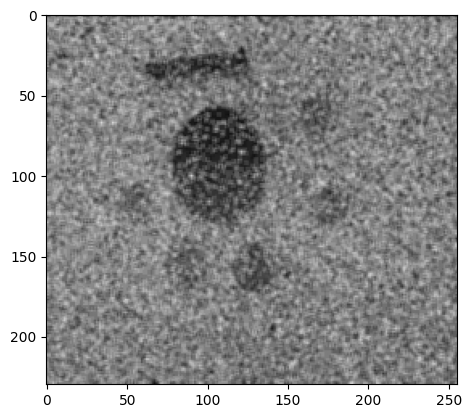

In [139]:
plt.imshow(avg, cmap='gray', vmin=0, vmax=255)

### Visualmente, ¿cómo es el resultado y a qué se debe?

El resultado visual muestra una reducción del ruido en la imagen, aunque todavía hay una textura granulada presente. Al utilizar un filtro promedio de 3x3, se logra un efecto de suavizado sobre la imagen al reemplazar cada pixel con el promedio de sus vecinos en una ventana de 3x3. Sin embargo, aunque esto ayuda a atenuar las variaciones bruscas de intensidad causadas por el ruido impuesto, visualmente se puede notar que se difuminan detalles importantes de la imagen.

## Filtro Sigma Mean

In [ ]:
filtered_sigma_mean = generic_filter(noised_image, sigma_filter, size=(3,3))

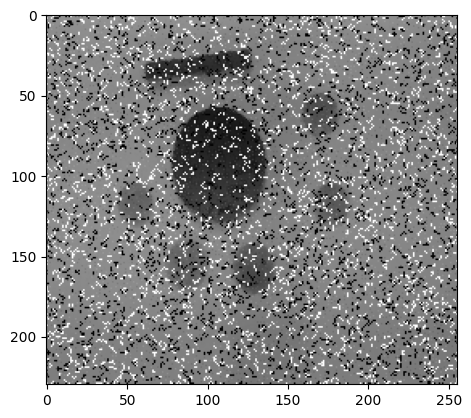

In [54]:
plt.imshow(filtered_sigma_mean, cmap='gray', vmin=0, vmax=1)

### Visualmente, ¿cómo es el resultado comparado con el filtro promedio lineal? Consultando la definición del Sigma explique este resultado. En el caso del ruido “sal y pimienta”, después de aplicar el filtro Sigma, quedan varios puntos aberrantes. ¿A qué se debe esto?

A diferencia del filtro promedio lineal, utilizando un filtro sigma promedio se observa que la reducción de ruido no fue tan significativa, ya que aun se observan varios puntos aberrantes provenientes del ruido sal y pimienta introducido sobre la imagen original. Un punto a destacar, es que a diferencia del filtro promedio lineal, utilizando este filtro se conservan mejor los contornos. Esto sucede porque el filtro sigma tiene un suavizado más debil porque no promedia todos los píxeles en el vecindario, sino solo aquellos que están dentro de un rango de desviación estandar respecto al valor del pixel central. En este caso, como el ruido esta distribuido de manera densa en la imagen, es posibkle que algunos píxeles ruidosos no sean eliminados correctamente, ya que el filtro no tiene suficientes valores válidos en su vencindario para reemplazarlos.

## Filtro Sigma Median

In [55]:
filtered_sigma_median = generic_filter(noised_image, sigma_filter, size=(3,3), extra_arguments=(True,))

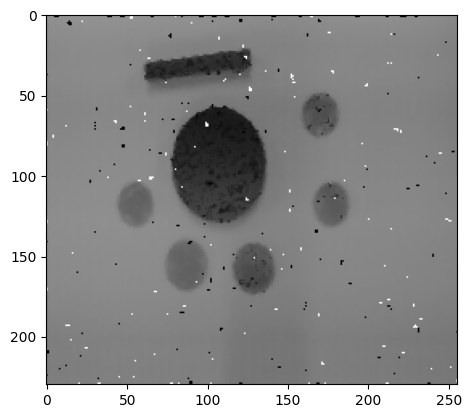

In [60]:
plt.imshow(filtered_sigma_median, cmap='gray', vmin=0, vmax=1)

### Visualmente, ¿cómo es el resultado comparado con el filtro promedio lineal? Consultando la definición del Sigma explique este resultado. En el caso del ruido “sal y pimienta”, después de aplicar el filtro Sigma, quedan varios sólo algunos aberrantes. ¿A qué se debe esto? ¿Por qué hay una diferencia significativa con el resultado anterior?

A diferencia del filtro promedio lineal, utilizando un filtro sigma basado en la mediana se observa que la reducción de ruido en la imagen es notable y que adicionalmente, aunque aún son visibles algunas aberraciones, los contornos en la imagen se preservan mejor que en los dos filtros previamente usados. Esto sucede porque al utilizar la mediana se logra prevenir con más eficacia la influencia de valores atípicos dentro del vecindario del kernel, asegurando que los píxeles extremos no afecten el resultado final.

## Filtro Median

In [79]:
median  = median(noised_image_uint8, footprint=footprint_rectangle((3,3)))

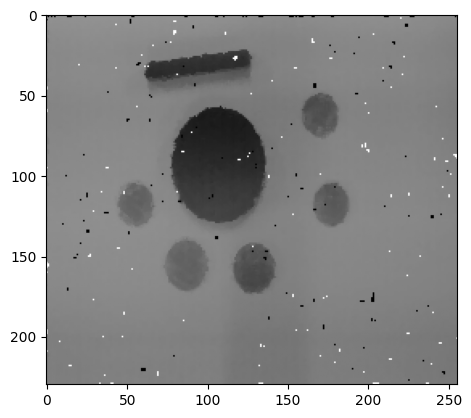

In [80]:
plt.imshow(median, cmap='gray', vmin=0, vmax=255)

### Visualmente, ¿cómo es el resultado comparado con los dos filtros anteriores? ¿A qué se debe este resultado? Evalúe los otros filtros que ofrece el módulo filters.rank de scikit-image: majority, maximum, minumum, modal, geometric_mean. Explique su comportamiento.

En comparación con los filtros anteriores, utilizando un filtro de la mediana se puede notar una mejora significativa en la reducción de ruido. Adicionalmente, este preserva los contornos de la imagen, ya que la mediana selecciona un valor representativo dentro del vecindario sin verse afectada por valores atípicos. Esto permite eliminar eficazmente el ruido "sal y pimienta" sin generar un efecto de suavizado excesivo en los bordes.

A continuación se evaluaran los otros filtros que ofrece el módulo de filers.rank:

#### Majority
- Este filtro asigna a cada píxel el valor más frecuente dentro de su vecindario.
- Suaviza la imagen y elimina ruido disperso, pero puede generar efectos no deseados si hay regiones de ruido predominantes.

#### Maximum
- Reemplaza cada píxel por el valor máximo dentro del vecindario.
- Tiende a aumentar el brillo de la imagen y resaltar áreas más iluminadas, lo que puede incrementar el ruido si hay puntos brillantes no deseados.

#### Minimum
- Reemplaza cada píxel por el valor mínimo dentro del vecindario.
- Produce un efecto de oscurecimiento, útil para eliminar puntos brillantes de ruido, pero puede acentuar el ruido en áreas más oscuras.

#### Modal
- Similar al filtro Majority, asigna a cada píxel el valor más repetido dentro del vecindario.
- Funciona bien para imágenes con regiones homogéneas, pero puede perder detalles en imágenes con transiciones suaves.

#### Geometric Mean
- Calcula la media geométrica de los valores dentro del vecindario, en lugar de la media aritmética.
- Proporciona un suavizado moderado y es útil para reducir ruido multiplicativo, pero no es tan eficaz contra el ruido "sal y pimienta".


## Operaciones 3 - 6 - RUIDO UNIFORME AMPLITUD 30

In [112]:
noise = np.random.uniform(low=0, high=30, size=morpho.shape).astype(np.uint8)
noised_image = morpho + noise

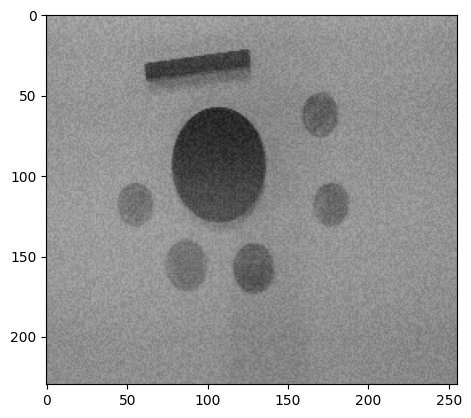

In [113]:
plt.imshow(noised_image, cmap='gray', vmin=0, vmax=255)

## Filtro Promedio

In [114]:
avg = mean(noised_image, footprint=footprint_rectangle((3,3)))

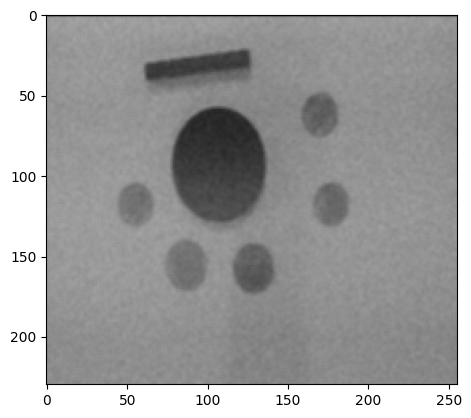

In [115]:
plt.imshow(avg, cmap='gray', vmin=0, vmax=255)

### Visualmente, ¿cómo es el resultado y a qué se debe?

Utilizando un filtro promedio (3x3) se puede observar un efecto de suavizado en la imagen, atenuando un poco el ruido uniforme introducido. Esto se debe a que al utilizar un filtro promedio de 3x3, se logra un efecto de suavizado sobre la imagen al reemplazar cada pixel con el promedio de sus vecinos en una ventana de 3x3.

## Filtro Sigma Mean

In [116]:
filtered_sigma_mean = generic_filter(noised_image, sigma_filter, size=(3,3))

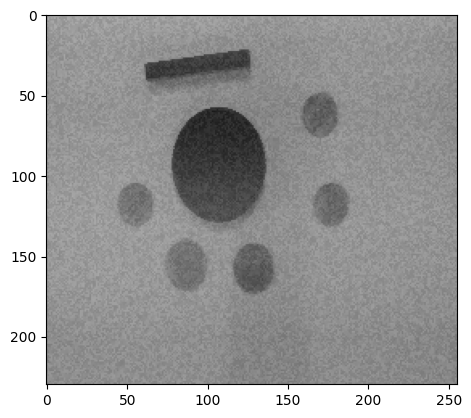

In [117]:
plt.imshow(filtered_sigma_mean, cmap='gray', vmin=0, vmax=255)

### Visualmente, ¿cómo es el resultado comparado con el filtro promedio lineal? 

En comparación con el filtro lineal, se logra efecto de suavizado no tan significativo pero manteniendo con mejor definición los contornos.

## Filtro Sigma Median

In [118]:
filtered_sigma_median = generic_filter(noised_image, sigma_filter, size=(3,3), extra_arguments=(True,))

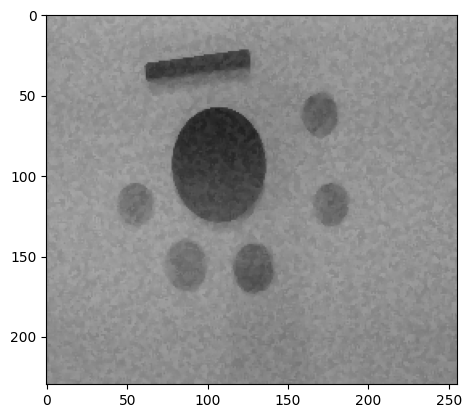

In [119]:
plt.imshow(filtered_sigma_median, cmap='gray', vmin=0, vmax=255)

### Visualmente, ¿cómo es el resultado comparado con el filtro promedio lineal? 

En comparación con el filtro lineal, se logra un efecto de suavizado manteniendo con mejor definición los contornos. Manteniendo el ruido menos disperso que utilizando un filtro sigma promedio.

## Operaciones 6 y 7 - FISSURE

In [127]:
fissure = cv2.imread('images/fissure.png', cv2.IMREAD_GRAYSCALE)

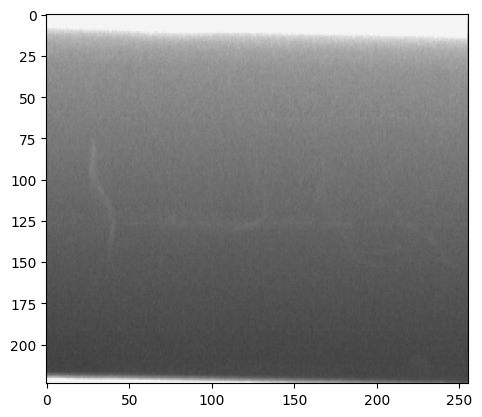

In [128]:
plt.imshow(fissure, cmap='gray', vmin=0, vmax=255)

# Filtro Sigma Median

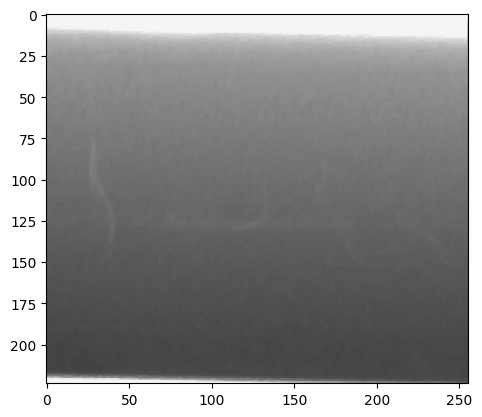

In [129]:
filtered_sigma_median = generic_filter(fissure, sigma_filter, size=(3,3), extra_arguments=(True,))
plt.imshow(filtered_sigma_median, cmap='gray', vmin=0, vmax=255)

# Filtro Median

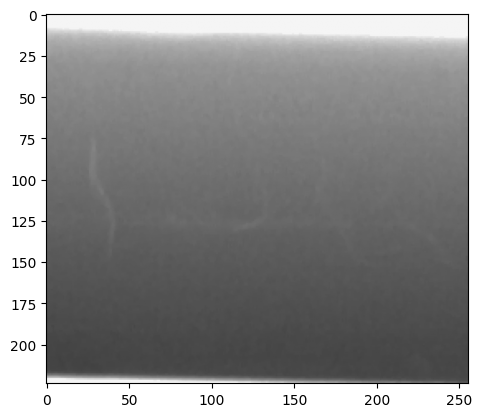

In [141]:
median = median(fissure, footprint=footprint_rectangle((3,3)))
plt.imshow(median, cmap='gray', vmin=0, vmax=255)

### Compare los resultados obtenidos. Concluya en qué casos (características de la imagen, tipo de ruido, ...) se usan cada uno de estos filtros.

A partir de los resultados obtenidos, se podría concluir que utilizar los siguientes filtros para las imágenes con los siguientes tipos de ruido mejora la calidad de la imagen y reduce el impacto del ruido:

#### Ruido Sal y Pimienta:

- Filtro Mediana: Es el más efectivo, ya que elimina los valores extremos sin difuminar los bordes.
- Filtro Sigma Median: También es una buena opción, preserva los contornos mejor que otros filtros al excluir valores fuera de un umbral sigma.

#### Ruido Uniforme
- Filtro Promedio (Mean): Ayuda a distribuir los valores uniformemente y reduce la varianza del ruido.
- Filtro Sigma Mean: Filtra valores extremos pero sin afectar tanto los bordes.